# High-level scientific computing with `SciPy` (Draft)


Serving as the central package for scientific operations in `Python`, `SciPy` is specifically designed to work efficiently with `NumPy` arrays. Before we develop a new routine, it's advisable to verify if `SciPy` already offers the required data processing functionality. As non-professional programmers, scientists may sometimes duplicate existing solutions, leading to error-prone, suboptimal, hard-to-share, and unmaintainable code. In contrast, `SciPy` provides optimized and tested routines, which we should utilize whenever feasible.

`SciPy` is composed of task-specific sub-modules:

<div align="center">

| Module            | Functionality                          |
|-------------------|----------------------------------------|
| scipy.integrate   | Integration routines                   |
| scipy.linalg      | Linear algebra routines                |
| scipy.optimize    | Optimization                           |
| scipy.stats       | Statistics                             |

</div>

They all depend on `NumPy`, but are mostly independent of each other. The standard way of importing these modules is:

In [1]:
package_name = "scipy"

try:
    __import__(package_name)
    print(f"{package_name} is already installed.")
except ImportError:
    print(f"{package_name} not found. Installing...")
    %pip install {package_name}

scipy is already installed.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import linalg    # same for other sub-modules
from scipy import integrate # same for other sub-modules
from scipy import optimize  # same for other sub-modules
from scipy import stats     # same for other sub-modules

The primary `SciPy` namespace predominantly includes functions that actually belong to `NumPy`. These functions are exposed for historical reasons, and there's no need to use `import scipy` in our code.

## Linear algebra with `SciPy`

`NumPy` provides some tools for handling linear algebra applications within the `numpy.linalg` module. However, it is typically more advantageous to use `scipy.linalg` instead, unless you want to avoid adding `SciPy` as a dependency to your project. There are a few reasons for this preference:

- As the [official documentation](https://docs.scipy.org/doc/scipy/tutorial/linalg.html#scipy-linalg-vs-numpy-linalg) points out, `scipy.linalg` encompasses all the functions found in `numpy.linalg`, along with additional advanced functions not present in `numpy.linalg`.

- `scipy.linalg` always includes support for BLAS and LAPACK, which are libraries containing routines for executing numerical operations in an optimized manner. Conversely, the use of BLAS and LAPACK in `numpy.linalg` is optional. As a result, depending on your `NumPy` installation, `scipy.linalg` functions could be faster than those in `numpy.linalg`.

In summary, given that scientific and technical applications usually don't impose limitations on dependencies, opting for `scipy.linalg` over `numpy.linalg` is generally a wise decision.

### Using `scipy.linalg.solve()` to solve linear systems

Linear systems can be valuable tools in finding solutions to various practical and significant problems. A linear system of equations consists of a set of linear equations:

\begin{align}
a_{0,0}x_0 + a_{0,1}x_1 + \cdots + a_{0,n}x_n & = b_0 \\\
a_{1,0}x_0 + a_{1,1}x_1 + \cdots + a_{1,n}x_n & = b_1 \\\
& \vdots \\\
a_{m,0}x_0 + a_{m,1}x_1 + \cdots + a_{m,n}x_n & = b_m \\\
\end{align}

Using matrix notation, a linear system can be represented as $A \mathbf{x}= \mathbf{b}$, where

$$
A = \begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\\
a_{1,0} & a_{1,1} & \cdots & a_{1,n} \\\
\vdots & & & \vdots \\\
a_{m,0} & a_{m,1} & \cdots & a_{m,n} \\\
\end{bmatrix}
 \ \ , \ \
\mathbf{x} = \begin{bmatrix}
x_0 \\\ x_1 \\\ \vdots \\\ x_n
\end{bmatrix}
 \ \ , \ \
\mathbf{b} = \begin{bmatrix}
b_0 \\\ b_1 \\\ \vdots \\\ b_m
\end{bmatrix} 
$$

In this section, you will explore how to leverage `scipy.linalg.solve()` for solving linear systems. To illustrate its application, consider the example system below:

$$
\begin{align}
3x + 2y &= 12 \\
2x - y &= 1
\end{align}
$$

To take advantage of `scipy.linalg.solve()`, you must first represent the linear system as a matrix product, as demonstrated in the following equation:

$$
\begin{bmatrix}
3 & 2 \\
2 & -1
\end{bmatrix}
\times
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
12 \\
1
\end{bmatrix}
$$

Once this is done, you can utilize `scipy.linalg.solve()` to determine the solution to the system:

In [ ]:
A = np.array([
    [3, 2],
    [2, -1],
])

# To make it a column vector with two lines
b = np.array([12, 1]).reshape((2, 1))

x = linalg.solve(A, b)
x

array([[2.],
       [3.]])

We can verify that the solution is correct by:

In [ ]:
A @ x

array([[12.],
       [ 1.]])

Alternatively, matrix inversion can also be employed to solve the system. We can compute the inverse of matrix $A$ using `scipy.linalg.inv()` and then multiply it with vector $b$:

In [ ]:
A_inv = linalg.inv(A)
x = A_inv @ b
x

array([[2.],
       [3.]])

Since this system possesses a unique solution, the determinant of matrix $A$ must be non-zero. You can verify this by calculating the determinant using `det()` from `scipy.linalg`:

In [ ]:
linalg.det(A)

-6.999999999999999

As anticipated, the determinant is not zero. This confirms that the inverse of $A$, denoted as $A^{-1}$ and computed using `inv(A)`, does exist, implying that the system possesses a unique solution.

#### Solve or matrix inverse?

Utilizing the inverse $A^{-1}$ to solve $A \mathbf{x} = \mathbf{b}$ is not recommended for large matrices, as it can be computationally expensive. To demonstrate, let's create a large random matrix $A$ and vector $\mathbf{b}$, and then compute the solution $\mathbf{x}$ using two different methods:

In [ ]:
N = 10_000
A = np.random.rand(N,N)
b = np.random.rand(N,1)

Now we compare the speed of `scipy.linalg.solve()` with `scipy.linalg.inv()`:

In [ ]:
%%timeit
x = linalg.solve(A,b)

18 s ± 849 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
x = linalg.inv(A) @ b

55.3 s ± 1.86 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Solving with `scipy.linalg.solve()` is faster!

### Exploring eigenvalues and eigenvectors using `scipy.linalg.eig()`

Let $A$ be a square matrix. A non-zero vector $\mathbf{v}$ is considered an eigenvector for $A$ with eigenvalue $\lambda$ if

$$
A\mathbf{v} = \lambda \mathbf{v}
$$

By rearranging the equation, it becomes apparent that $\mathbf{v}$ is a solution to the homogeneous system of equations

$$
\left( A - \lambda I \right) \mathbf{v} = \mathbf{0}
$$

Here, $I$ represents the identity matrix of size $n$. Non-trivial solutions can only exist if the matrix $A - \lambda I$ is singular, which implies $\mathrm{det}(A - \lambda I) = 0$. Consequently, the eigenvalues of $A$ are the roots of the characteristic polynomial

$$
p(\lambda) = \mathrm{det}(A - \lambda I)
$$

The [`scipy.linalg.eig()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html) function calculates the eigenvalues and eigenvectors of a square matrix $A$. Let's examine a basic example featuring a diagonal matrix:

In [ ]:
A = np.array([[1,0],[0,-2]])
A

array([[ 1,  0],
       [ 0, -2]])

The `linalg.eig()` function returns a `tuple` `(eigvals, eigvecs)`, where `eigvals` is a 1D `NumPy` array containing complex numbers representing the eigenvalues of $A$, and `eigvecs` is a 2D NumPy array with the corresponding eigenvectors arranged in the columns:

In [ ]:
eigvals, eigvecs = linalg.eig(A)
eigvals, eigvecs

(array([ 1.+0.j, -2.+0.j]),
 array([[1., 0.],
        [0., 1.]]))

If we are certain that the eigenvalues are real numbers (i.e., if $A$ is symmetric), we can apply the `NumPy` array method `real()` to convert the array of eigenvalues into real numbers:

In [ ]:
eigvals = eigvals.real
eigvals

array([ 1., -2.])

Notice that the position of an eigenvalue in the `eigvals` array corresponds to the column in `eigvecs` containing its associated eigenvector:

In [ ]:
lambda1 = eigvals[1]
v1 = eigvecs[:,1].reshape(2,1)
lambda1, v1

(-2.0,
 array([[0.],
        [1.]]))

We can verify that the solution is correct:

In [ ]:
A @ v1 == lambda1 * v1

(array([[ 0.],
        [-2.]]),
 array([[-0.],
        [-2.]]))

#### Symmetric Matrices

Indeed, for a symmetric matrix, the eigenvalues are always real and the eigenvectors are always orthogonal. Let's confirm these properties using some random matrices:

In [ ]:
n = 4
P = np.random.randint(0,10,(n,n))
P

array([[7, 7, 8, 4],
       [8, 2, 1, 2],
       [4, 9, 7, 2],
       [3, 7, 8, 4]])

We can create symmetric matrix using $S = P P^T$:

In [ ]:
S = P @ P.T
print(S)

[[178  86 155 150]
 [ 86  73  61  54]
 [155  61 150 139]
 [150  54 139 138]]


Let's unpack the eigenvalues and eigenvectors of $S$:

In [ ]:
evals, evecs = linalg.eig(S)
evals

array([4.85858726e+02+0.j, 4.71560580e+01+0.j, 2.82127092e-01+0.j,
       5.70308921e+00+0.j])

As observed, the eigenvalues have zero imaginary parts, confirming that they are indeed real numbers. Now, let's verify that the eigenvectors are orthogonal to one another:

In [ ]:
v1 = evecs[:,0] # First column is the first eigenvector
v2 = evecs[:,1] # Second column is the second eigenvector

v1 @ v2

8.326672684688674e-17

The dot product of eigenvectors $\mathbf{v}_1$ and $\mathbf{v}_2$ is zero (the number shown is *very* close to zero, attributable to rounding errors in the computations), which confirms their orthogonality!

#### Diagonalization

A square matrix $M$ is diagonalizable if there exists an invertible matrix $P$ such that $D = P^{-1}MP$ is a diagonal matrix. A remarkable result in linear algebra states that a square matrix $M$ of size $n$ is diagonalizable if and only if $M$ has $n$ independent eigenvectors. Moreover, $M = PDP^{-1}$, where the columns of $P$ consist of the eigenvectors of $M$ and $D$ has the corresponding eigenvalues along the diagonal.

Using this, let's create a matrix with given eigenvalues $\lambda_1 = 3, \lambda_2 = 1$ using `np.diag()`, and eigenvectors $v_1 = [1,1]^T, v_2 = [1,-1]^T$.

In [ ]:
P = np.array([[1,1],[1,-1]])
D = np.diag((3,1))
M = P @ D @ linalg.inv(P)

Let's verify that the eigenvalues of $M$ are 3 and 1:

In [ ]:
evals, evecs = linalg.eig(M)
evals

array([3.+0.j, 1.+0.j])

## Numerical Integration with `SciPy`

### Definite integral

The definite integral of a function $f(x)$ over an interval $[a,b]$ is the limit

$$
\int_a^b f(x) \, dx = \lim_{N \to \infty} \sum_{i=1}^N f(x_i^ * ) (x_i - x_{i-1}) \ \ , \ x_i^* \in [x_{i-1},x_i]
$$

where, for each $x_i$,

$$
x_0 = a < x_1 < \cdots < x_N = b
$$

is a partition of $[a,b]$ with $N$ subintervals, and the values $x_i^ * \in [x_{i-1},x_i]$ chosen in each subinterval are arbitrary. The definite integral represents the area under the curve of the graph of $y=f(x)$ on the interval $[a,b]$.

$$
\int_a^b f(x) \, dx = \text{area under the curve } y = f(x) \text{ on } [a,b]
$$

Note that the area above the $x$-axis is considered positive, while the area below the $x$-axis counts as negative area. For instance, we can visualize the integral:

$$
\int_{\pi/2}^{3\pi/2} \left( \sin(0.2 x) + \sin(2x)\right) dx
$$

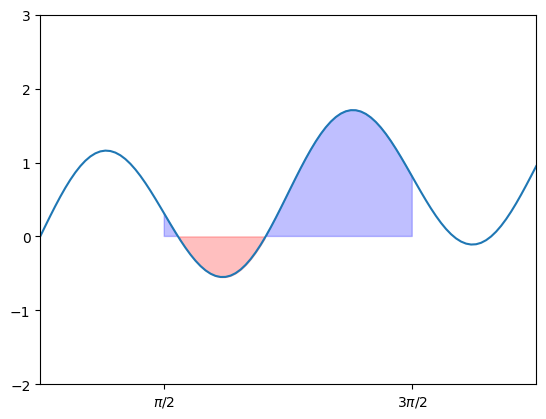

In [6]:
f = lambda x: np.sin(0.2*x) + np.sin(2*x)

x = np.linspace(0,2*np.pi,100)
y = f(x)
plt.plot(x,y)

X = np.linspace(np.pi/2,3*np.pi/2,100)
Y = f(X)
plt.fill_between(X, 0, Y, Y > 0, color='blue', alpha=.25)
plt.fill_between(X, 0, Y, Y < 0, color='red',  alpha=.25)

plt.xticks([np.pi/2,3*np.pi/2],['$\pi/2$','$3\pi/2$'])
plt.xlim([0,2*np.pi]); plt.ylim([-2,3]);

In this case, the positive area and negative area are represented by blue and red colors, respectively. We can calculate the area using `scipy.integrate.quad()`:

In [10]:
integrate.quad(f, np.pi, np.pi*3/2) # quad(f, a, b)

(2.106158710412371, 2.3383058938146415e-14)

The second item in the above `tuple` is the error. In introductory calculus courses, we typically concentrate on integrals that can be solved exactly using the Fundamental Theorem of Calculus, such as:

$$
\int_0^{\pi/2} \cos(x) \, dx = \sin(\pi/2) - \sin(0) = 1
$$

This result can be verified as follows:

In [14]:
f = lambda x: np.cos(x)

integrate.quad(f, 0, np.pi/2) # quad(f, a, b)

(0.9999999999999999, 1.1102230246251564e-14)

Nevertheless, most definite integrals cannot be solved exactly. For instance, the well-known error function in probability

$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$

is a definite integral for which there is no explicit formula. In such cases, we can still compute the integral value using numerical integration:

In [13]:
f = lambda x: 2/np.pi**(0.5)*np.exp(-x**2)

integrate.quad(f, 0, 1.96) # quad(f, a, b)

(0.9944262754648279, 1.1040349473132902e-14)

If you're interested in performing numerical differentiation, you can refer to the following libraries:

1. Findiff: [https://github.com/maroba/findiff](https://github.com/maroba/findiff)
2. Numdifftools: [https://github.com/pbrod/numdifftools](https://github.com/pbrod/numdifftools)

## Optimization

Optimization is the process of finding a numerical solution to a minimization or equality problem. The `scipy.optimize` module offers algorithms for function minimization (scalar or multi-dimensional), curve fitting, and root finding.

When optimizing input parameters for a function, `scipy.optimize` offers various helpful methods suitable for different types of functions:

- `curve_fit()` for fitting a function to a set of data
- `minimize()` for minimizing a function of one variable or multiple variables
- `root()` for finding the zeros of a function of one variable or multiple variables

In practice, all of these functions perform optimization in some form. The distinction lies in the type of function being optimized and the constraints applied to the optimization process.

### Curve fitting

Suppose we have data on a sine wave, with some noise:

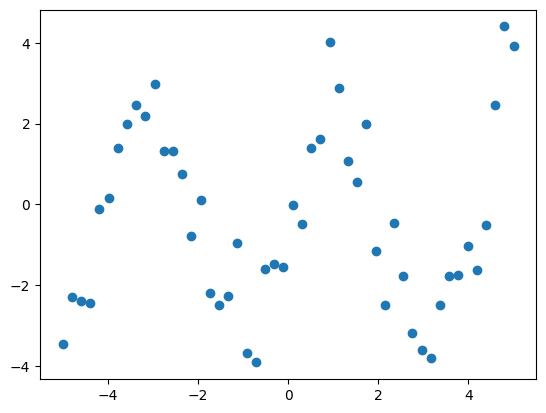

In [19]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)
plt.scatter(x_data, y_data)

If we have data that we know follows a sine wave but are unsure of the amplitudes or the period, we can determine those values using least squares curve fitting. To begin, we need to define the test function to fit. In this case, it's a sine function with unknown amplitude and period:

In [20]:
def test_func(x, a, b):
    return a * np.sin(b * x)

We then use `scipy.optimize.curve_fit()` to find `a` and `b`:

In [21]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2,2])

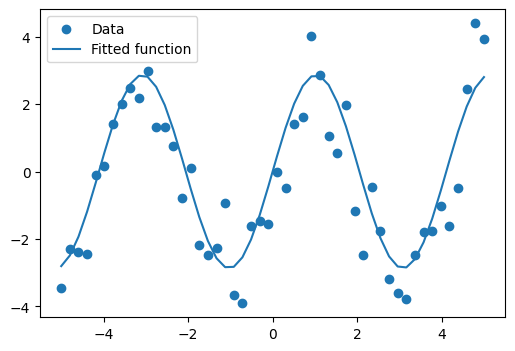

In [22]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

### Finding the minimum of a scalar function

`scipy.optimize` also features the more versatile `minimize()` function. This function is capable of handling multivariate inputs and outputs and employs more advanced optimization algorithms to manage this complexity. Additionally, `minimize()` can accommodate constraints on the solution to your problem. Let's explore a simple example to demonstrate its functionality:

In [23]:
f = lambda x: x**2 + 10*np.sin(x)

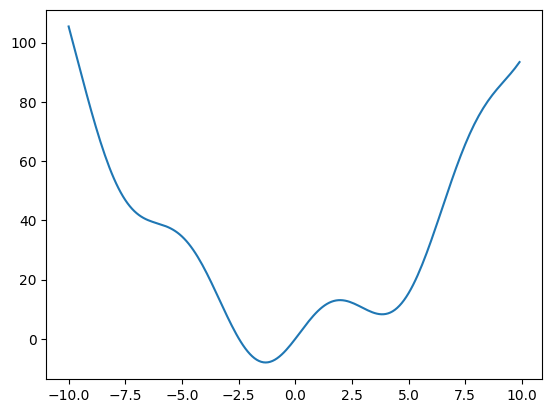

In [24]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

This function has a global minimum around -1.3 and a local minimum around 3.8. To search for the minimum, you can use `scipy.optimize.minimize()`. By providing a starting point `x0`, the function returns the location of the minimum it has discovered:

In [29]:
result = optimize.minimize(f, x0=0)
xmin_global = result.x
result, type(result)

(  message: Optimization terminated successfully.
   success: True
    status: 0
       fun: -7.945823375615215
         x: [-1.306e+00]
       nit: 5
       jac: [-1.192e-06]
  hess_inv: [[ 8.589e-02]]
      nfev: 12
      njev: 6,
 scipy.optimize._optimize.OptimizeResult)

The output of `minimize()` is an instance of the `OptimizeResult` class. This class gathers various relevant details from the optimizer's run, including information on whether the optimization was successful or not. In this case, it finds the global minimum.

A potential issue with this approach is that if the function has local minima, the algorithm might find one of these local minima instead of the global minimum, depending on the choice of the initial point `x0`. This is because many optimization algorithms are sensitive to the starting point and can get trapped in local minima, preventing them from reaching the global minimum. For instance, let's try to set `x0` to 3:

In [31]:
res = optimize.minimize(f, x0=3)
xmin_local = res.x
xmin_local

array([3.83746709])

In this case, it finds the local minimum. Besides the starting point `x0`, we can constrain the variable to the interval `(0, 10)` using the `bounds` argument:

In [25]:
res = optimize.minimize(f, x0=1, bounds=((0,10),))
res

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.0
        x: [ 0.000e+00]
      nit: 1
      jac: [ 1.000e+01]
     nfev: 4
     njev: 2
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

If the optimization was successful, then `fun` is the value of the objective function at the optimal value `x`. We can see from the output that, as expected, the minimum value at this range is `x = 0`.

As we may know, not every function has a minimum. For instance, if our objective function is $y = x^3$, it will result in a `Desired error not necessarily achieved due to precision loss` because the optimizer eventually tries a number that is too big to be calculated by the computer.

In [26]:
f1 = lambda x: x**3
optimize.minimize(f1, x0=-3)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -1115932097.8874247
        x: [-1.037e+03]
      nit: 1
      jac: [ 3.228e+06]
 hess_inv: [[-3.204e-04]]
     nfev: 236
     njev: 112

### Finding the roots of a scalar function

To find a root, that is, a point where $f(x) = 0$, of the function $f$ mentioned earlier, we can utilize `scipy.optimize.root()`:

In [33]:
root = optimize.root(f, x0=1)  # our initial guess is 1
root

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 0.000e+00]
    nfev: 10
    fjac: [[-1.000e+00]]
       r: [-1.000e+01]
     qtf: [ 1.333e-32]

Keep in mind that only one root is discovered. Examining the plot of $f$ indicates that there is a second root around -2.5. We can determine the exact value of this root by modifying our initial estimate:

In [34]:
root2 = optimize.root(f, x0=-2)
root2.x

array([-2.47948183])

The following figure displays the roots and minimum we have identified up to this point:

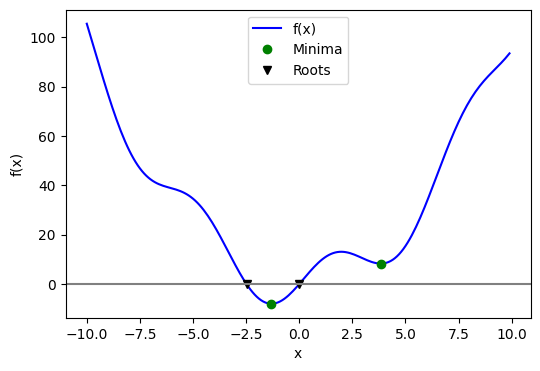

In [35]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

# Plot the minima
xmins = np.array([xmin_global[0], xmin_local[0]])
ax.plot(xmins, f(xmins), 'go', label="Minima")

# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')
plt.show()

## Statistics

The `scipy.stats` module encompasses statistical tools and probabilistic representations of random processes.

### Distributions: histogram and probability density function

Given observations of a random variable that adheres to a normal distribution:

In [ ]:
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

The histogram of these observations serves as an estimator of the random process's PDF (probability density function):

In [ ]:
histogram = np.histogram(samples, bins=bins, density=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

We can overlap the estimation with the actual PDF calculated using `scipy.stats.norm()`:

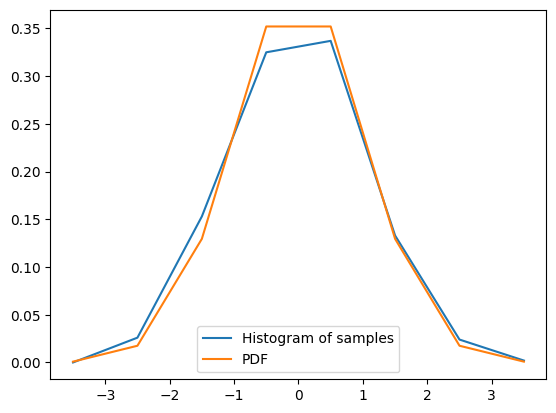

In [ ]:
pdf = stats.norm.pdf(bins)  # norm is a distribution object
plt.plot(bins, histogram, label="Histogram of samples")
plt.plot(bins, pdf, label="PDF")
plt.legend();

We can see that the estimate using histogram is quite close to the true PDF.

### Hypothesis testing

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes:

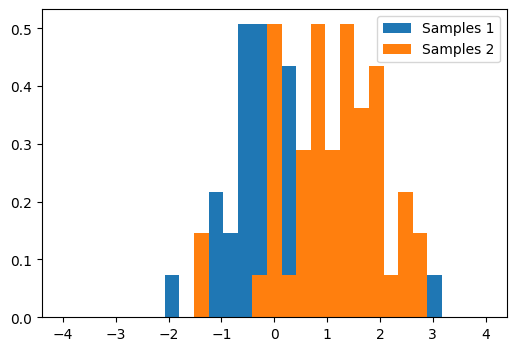

In [17]:
# Generates 2 sets of observations
samples1 = np.random.normal(0, size=50)
samples2 = np.random.normal(1, size=50)

# Compute a histogram of the sample
bins = np.linspace(-4, 4, 30)
histogram1, bins = np.histogram(samples1, bins=bins, density=True)
histogram2, bins = np.histogram(samples2, bins=bins, density=True)

plt.figure(figsize=(6, 4))
plt.hist(samples1, bins=bins, density=True, label="Samples 1")
plt.hist(samples2, bins=bins, density=True, label="Samples 2")
plt.legend(loc='best')

We can use a T-test using `scipy.stats.ttest_ind()` to decide whether the means of two sets of observations are significantly different:

In [18]:
stats.ttest_ind(samples1, samples2)

Ttest_indResult(statistic=-4.547017710744573, pvalue=1.5576418947888603e-05)

The resulting output is composed of:
- The `T` statistic value: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.
- The `p` value: the probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means.

For the above test, we can reject the null hypotheis that these two samples have the same mean.

All in all, `SciPy` is an open-source library designed for scientific computing in Python. It builds upon the core functionality provided by the `NumPy` and offers a comprehensive suite of additional tools for various scientific domains, including linear algebra, optimization, statistics and more. `SciPy` is widely used in research, education, and industry for applications in fields like physics, engineering, and data science. Its extensive documentation, active community, and frequent updates make it an essential tool for anyone working with numerical computations in `Python`.